In [81]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

패션 MNIST

In [82]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [83]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [84]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


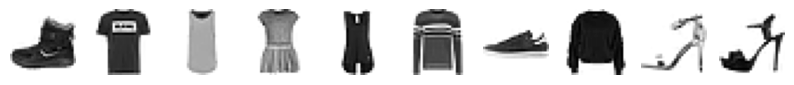

In [85]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [86]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [87]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### 로지스틱 회귀로 패션 아이템 분류하기

In [88]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [89]:
print(train_scaled.shape)

(60000, 784)


In [90]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


### 인공신경망

텐서플로와 케라스

In [91]:
import tensorflow as tf

In [92]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [93]:
data = keras.datasets.fashion_mnist.load_data()
data[0][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [94]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [95]:
train_scaled.shape

(60000, 784)

In [96]:
from sklearn.model_selection import train_test_split

# test_input

# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# train_scaled.reshape(-1,1).shape
# train_scaled= train_scaled.reshape(-1,1) 

In [97]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [98]:
train_scaled.ndim

2

In [99]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [100]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [101]:
model = keras.Sequential([dense])

인공신경망으로 패션 아이템 분류하기

In [102]:
from keras.models import Sequential
from keras.layers import Dense

# Dense 레이어 정의
dense = Dense(units=128, activation='relu', input_shape=(784,))

# Sequential 모델 생성 및 Dense 레이어 추가
model = Sequential([dense])

# 모델 컴파일 (옵션에 따라 다르게 설정 가능)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 모델 요약 (옵션)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100480 (392.50 KB)
Trainable params: 100480 (392.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [106]:
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.8519 - accuracy: 0.1000
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.8519 - accuracy: 0.1000
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.8519 - accuracy: 0.1000
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.8519 - accuracy: 0.1000
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.8519 - accuracy: 0.1000


In [117]:
history.history

{'loss': [4.851947784423828,
  4.851947784423828,
  4.851947784423828,
  4.851947784423828,
  4.851947784423828],
 'accuracy': [0.09997916966676712,
  0.09997916966676712,
  0.09997916966676712,
  0.09997916966676712,
  0.09997916966676712]}

In [105]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 4.8558 - accuracy: 0.1001


[4.855799674987793, 0.10008333623409271]

In [119]:
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28, 28)))
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [120]:
(train_input2, train_target2), (test_input2, test_target2) = keras.datasets.fashion_mnist.load_data()

train_scaled2 = train_input2 / 255.0

train_scaled2, val_scaled2, train_target2, val_target2 = train_test_split(
    train_scaled2, train_target2, test_size=0.2, random_state=42)

In [121]:
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_scaled2, train_target2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5341 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3932 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3549 - accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3340 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3169 - accuracy: 0.8861


In [122]:
model2.evaluate(val_scaled2, val_target2)

375/375 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8746


[0.36204013228416443, 0.8745833039283752]

In [137]:
history.history

{'loss': [4.851947784423828,
  4.851947784423828,
  4.851947784423828,
  4.851947784423828,
  4.851947784423828],
 'accuracy': [0.09997916966676712,
  0.09997916966676712,
  0.09997916966676712,
  0.09997916966676712,
  0.09997916966676712]}

In [124]:
history2.history

{'loss': [0.5341317057609558,
  0.3931519687175751,
  0.3548721373081207,
  0.3339902460575104,
  0.3168899416923523],
 'accuracy': [0.8112708330154419,
  0.8583124876022339,
  0.8731041550636292,
  0.8811041712760925,
  0.886145830154419]}

In [146]:
import pandas as pd
history_df = pd.DataFrame(data=history.history)
history_df2 = pd.DataFrame(data=history2.history)

x = history_df['accuracy']
y = history_df2['accuracy']
x_len = np.arange(len(x))
y_len = np.arange(len(x))

In [147]:
history_df['accuracy'], history_df2['accuracy']

(0    0.099979
 1    0.099979
 2    0.099979
 3    0.099979
 4    0.099979
 Name: accuracy, dtype: float64,
 0    0.811271
 1    0.858312
 2    0.873104
 3    0.881104
 4    0.886146
 Name: accuracy, dtype: float64)

(array([0, 1, 2, 3, 4]),
 0    0.099979
 1    0.099979
 2    0.099979
 3    0.099979
 4    0.099979
 Name: accuracy, dtype: float64)

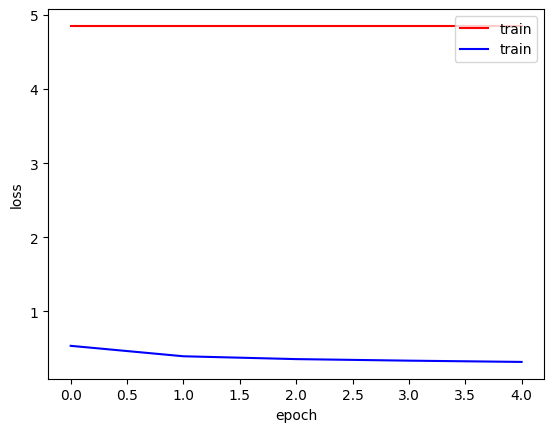

In [157]:
plt.plot(history.history['loss'], c="red",   label='train')
plt.plot(history2.history['loss'], c="blue",   label='val')
# plt.plot(y, c="blue",   label='val')
plt.legend(loc=1)
# plt.xlim(0, 10)
# plt.xlim(0, 2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()